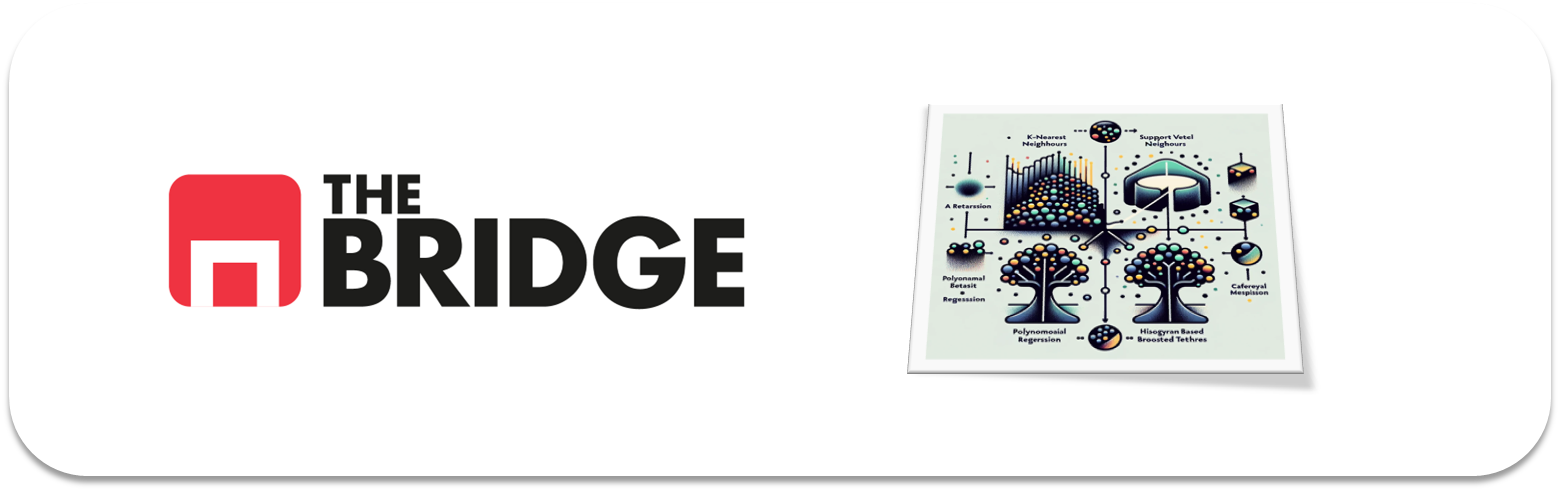

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import bootcampviztools as bt

In [108]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



In [109]:
cheat = {
'Acidez fija': 'La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente)',
'Acidez volátil': 'La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.',
'Ácido cítrico': 'Encontrado en pequeñas cantidades, el ácido cítrico puede añadir "frescura" y sabor a los vinos.',
'Azúcar residual': 'Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.',
'Cloruros': 'La cantidad de sal en el vino.',
'Dióxido de azufre libre': 'La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.',
'Dióxido de azufre total': 'Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.',
'Densidad': 'La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.',
'pH': 'Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.',
'Sulfatos': 'Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.',
'Alcohol': 'El porcentaje de contenido de alcohol del vino.',
'Calida': 'Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).',
'Class': 'Si es blanco o tinto.'
}

Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [110]:
df_wine = pd.read_csv('./data/wines_dataset.csv', sep= '|')
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [111]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [112]:
df_wine.quality.value_counts(True)
# esta va a ser la target categorica, para clasificacion

target_cat = df_wine.quality
# priorizamos el recall

In [113]:
# df_wine.alcohol.value_counts(True)
# esta va a ser la target numerica, para regresion

target_num = df_wine.alcohol
# priorizamos precision, mejor porcentaje de acierto

vamos a generar dos datas, uno para estudiar y modelar de cara a la calidad de vino y otro de cara al alcohol del vino

In [114]:
# CALIDAD

train_set, test_set = train_test_split(df_wine, test_size= 0.2, random_state= 42)

train_set['class'] = train_set['class'].apply(lambda x: 1 if x == 'white' else 0)
test_set['class'] = test_set['class'].apply(lambda x: 1 if x == 'white' else 0)

qua_x_train = train_set.drop(columns= 'quality')
qua_y_train = train_set.quality

qua_x_test = test_set.drop(columns= 'quality')
qua_y_test = test_set.quality

In [115]:
# ALCOHOL

al_x_train = train_set.drop(columns= 'alcohol')
al_y_train = train_set.alcohol

al_x_test = test_set.drop(columns= 'alcohol')
al_y_test = test_set.alcohol

In [116]:
train_set.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.213527,0.339548,0.319244,5.466615,0.055733,30.563306,115.592457,0.994714,3.219144,0.531083,10.490439,5.817587,0.751780
std,1.293974,0.162938,0.145978,4.783581,0.032656,18.004967,56.805306,0.003012,0.160025,0.147928,1.194099,0.870688,0.432022
min,3.900000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,76.000000,0.992360,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.400000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.500000,1.330000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.980000,14.050000,9.000000,1.000000


In [117]:
for i in train_set.columns:
    print(f'Cardinalidad columna {i} -> {train_set[i].nunique()}.')

Cardinalidad columna fixed acidity -> 100.
Cardinalidad columna volatile acidity -> 177.
Cardinalidad columna citric acid -> 87.
Cardinalidad columna residual sugar -> 308.
Cardinalidad columna chlorides -> 194.
Cardinalidad columna free sulfur dioxide -> 132.
Cardinalidad columna total sulfur dioxide -> 274.
Cardinalidad columna density -> 951.
Cardinalidad columna pH -> 106.
Cardinalidad columna sulphates -> 106.
Cardinalidad columna alcohol -> 102.
Cardinalidad columna quality -> 7.
Cardinalidad columna class -> 2.


hay que mostrar la distribucion de las targets

<BarContainer object of 7 artists>

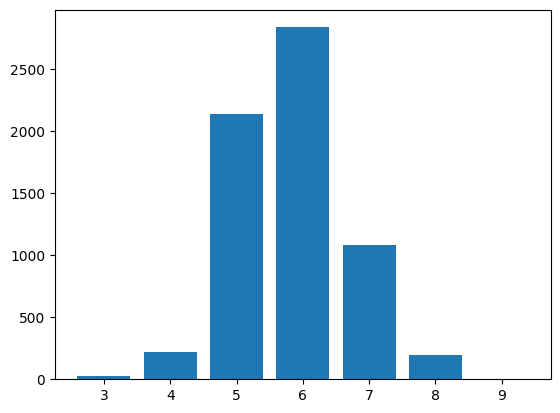

In [118]:
# QUALITY

conteo_calidad = df_wine.quality.value_counts()

plt.bar(x= conteo_calidad.index, height= conteo_calidad.values)
# ojo que esto es tricky, parece una distribucion normal, pero estamos haciendo una clasificacion, asi que no miramos su distribucion sino el reparto, yo diria y digo que esta desbalanceado

<Axes: xlabel='alcohol', ylabel='Count'>

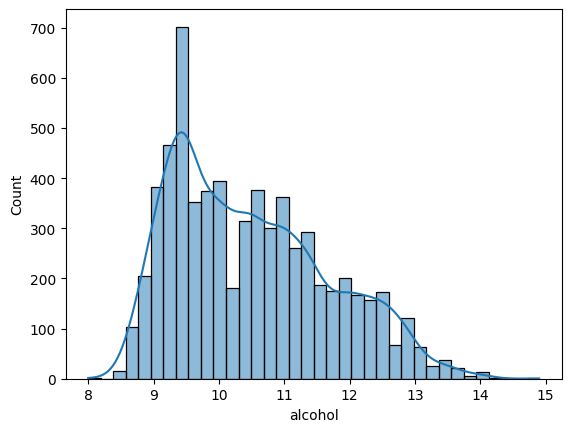

In [119]:
# ALCOHOL

sns.histplot(df_wine.alcohol, kde= True) # aqui si nos fijamos en la distribucion, esto es numerico y vamos a mirar regresion
# esto esta desbalanceado

In [120]:
# las dos estan desbalanceadas, deberia equilibrarlas un poco, por experiencia me gusta el SMOTE asi que las equilibrare con esta herramienta
# alcohol numerica con log?

vamos a hacer un heatmap a ver las correlaciones

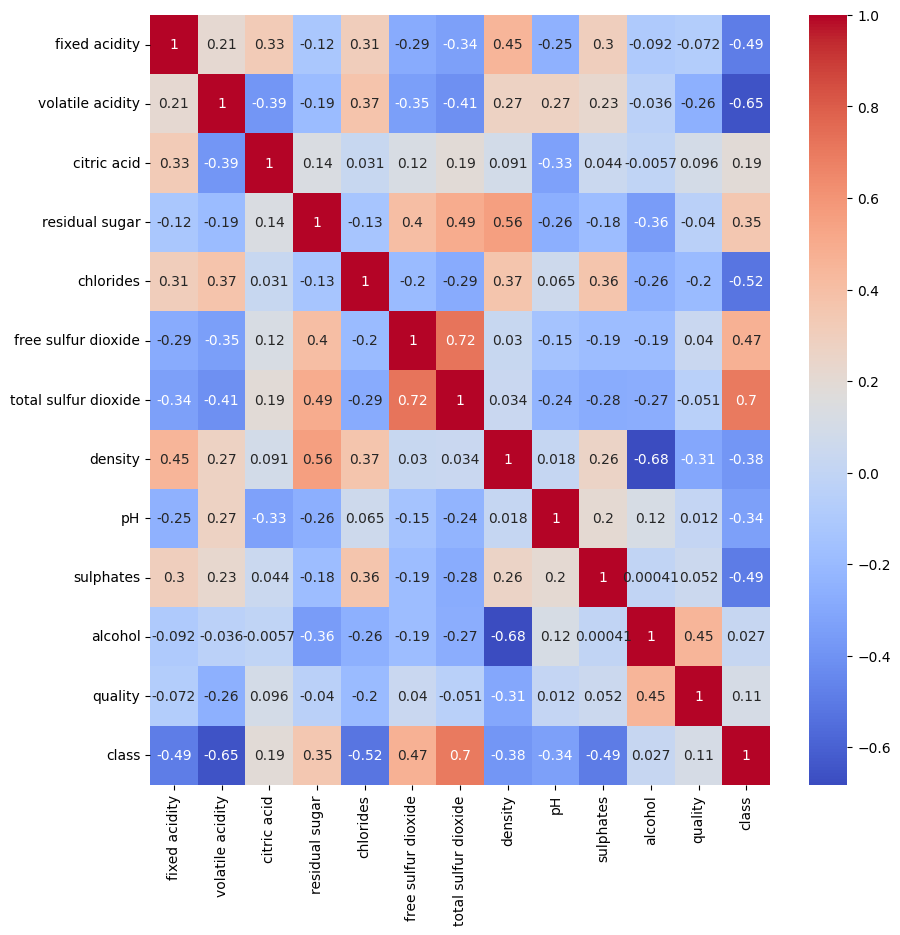

In [121]:
corr_matrix = train_set.corr()
plt.figure(figsize= (10, 10))
sns.heatmap(corr_matrix, cmap= 'coolwarm', annot= True);

hemos comparado las correlaciones y hemos observado algunas variables potenciales para excluirlas

ahora vamos a estudiar estas correlaciones entre las variables graficamente para terminar de seleccionar las features para los modelos

vamos a mirar las graficas para el modelo de calidad

In [122]:
features_num = pd.DataFrame(qua_x_train.drop(columns= ['class'])).columns.to_list()
features_cat = pd.DataFrame(qua_x_train['class']).columns.to_list()

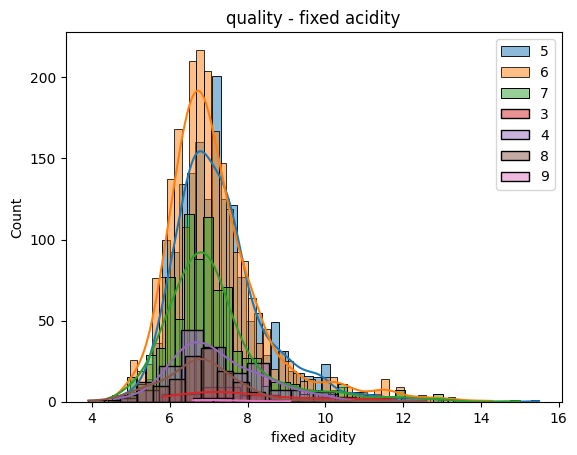

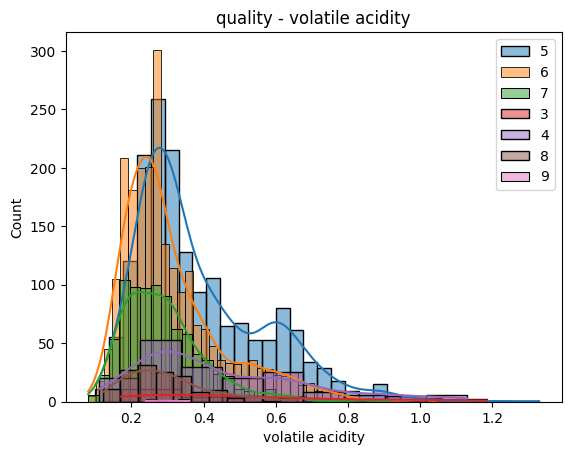

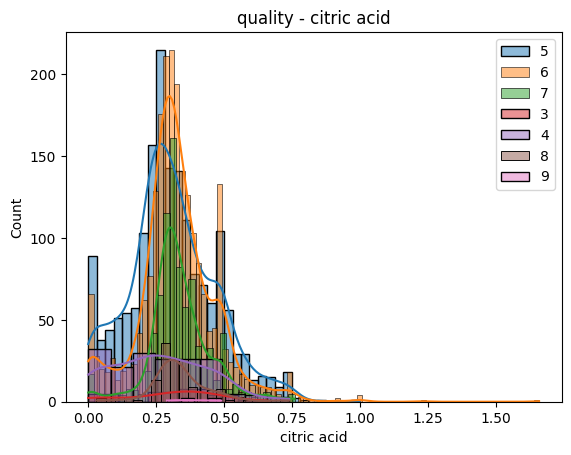

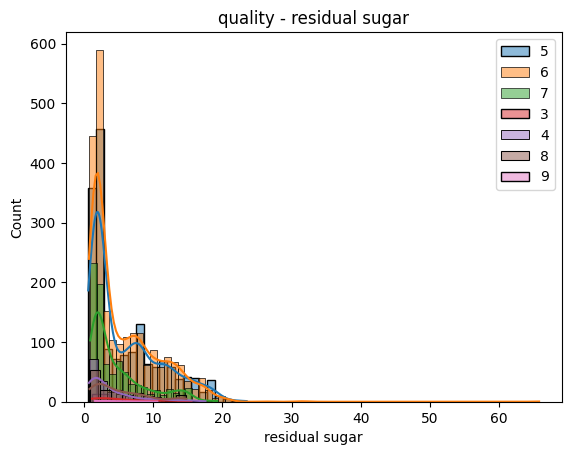

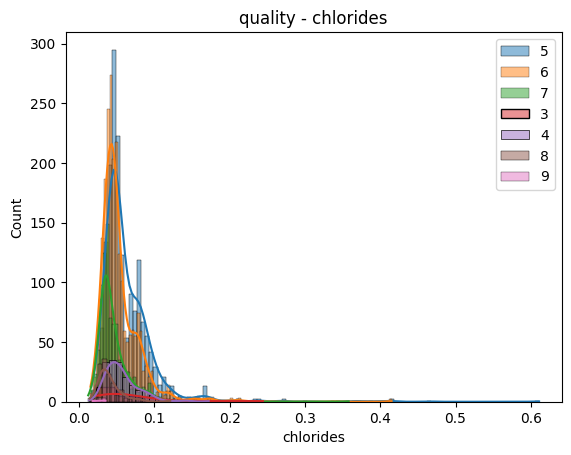

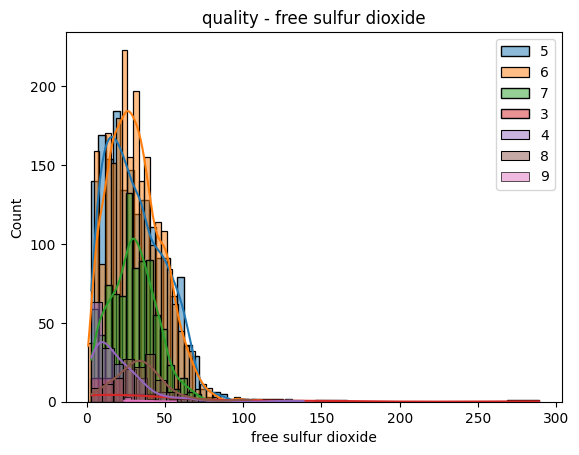

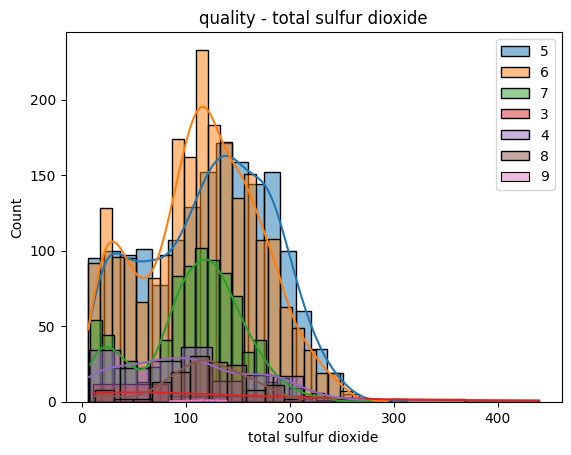

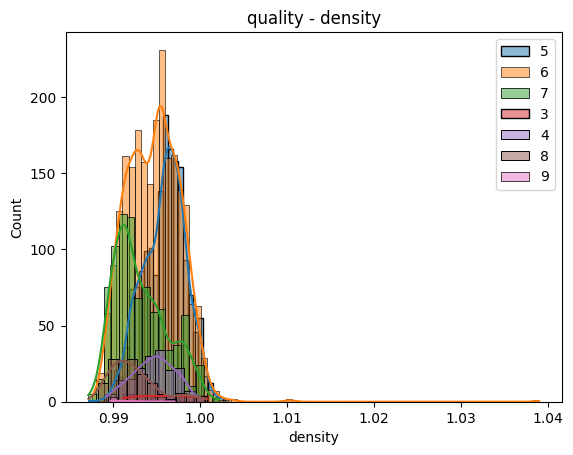

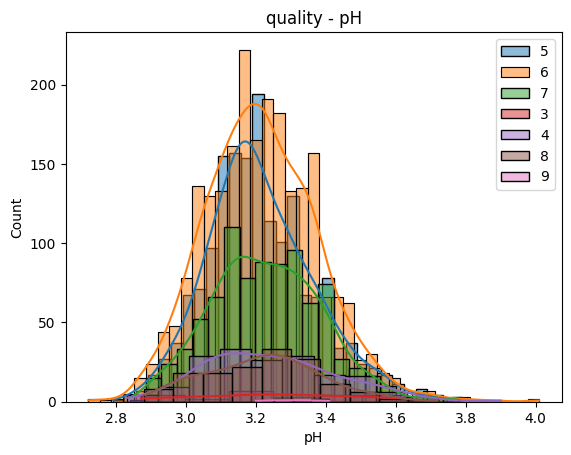

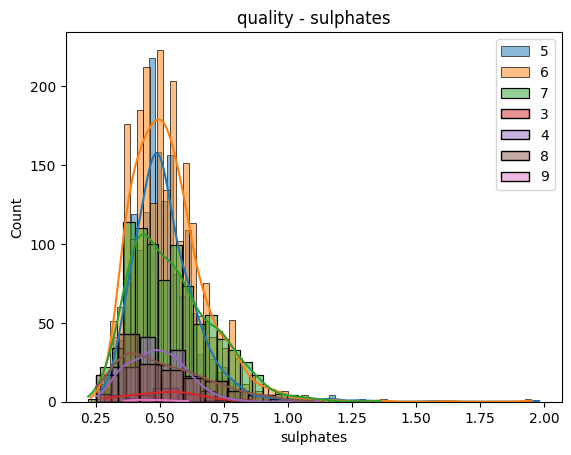

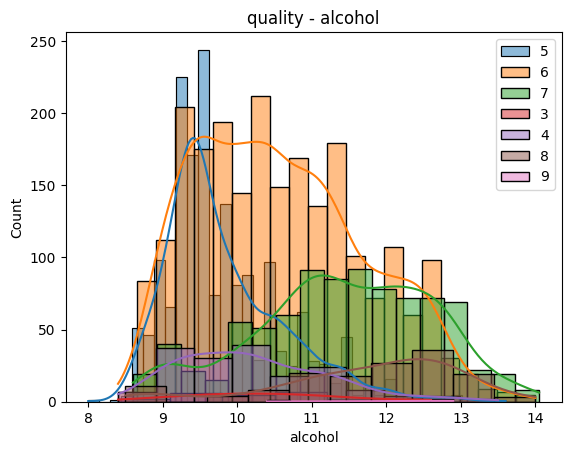

In [123]:
for col in features_num:
    for val in qua_y_train.unique():
        sns.histplot(train_set[train_set['quality'] == val][col], kde= True, label=str(val))
    plt.title(f'quality - {col}')
    plt.legend()
    plt.show()
    
    

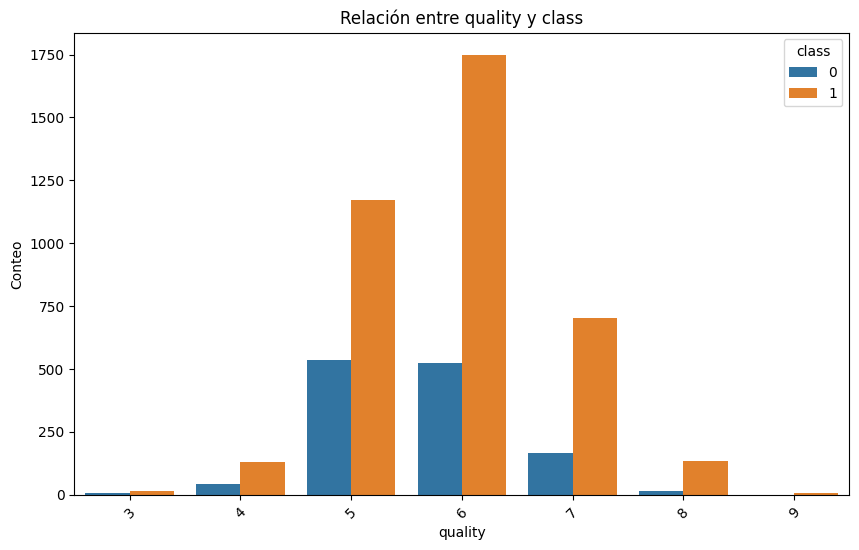

In [124]:
# comparamos target con categorica class

bt.plot_categorical_relationship_fin(train_set, 'quality', 'class', size_group= 7)
# clase parece relevante, pero tenia colinealidad alta con volatile acidity. no la selecciono porque volatile tiene mas correlacion y elijo esa

In [125]:
# hacemos la seleccion final de features para el modelo de prediccion categorico en base a la observacion de correlacion y graficas

features_mod_quality = ['volatile acidity', 'chlorides', 'alcohol', 'citric acidity', 'free sulfur dioxide']

'''
esta seleccion es en base a:
class ha sido descartada porque aun con alta correlacion, tenia colinealidad elevada con volatile acidity y menos relevancia en comparacion con el target
density ha sido descartada porque aun con alta correlacion, tenia colinealidad elevada con alcohol y menos relevancia en comparacion con el target
citric acidity y free sugar dioxide no presentaban una correlacion especialmente alta, pero sus graficas me han parecido relevantes y he decidido seleccionarlas
el resto de variables descartadas es debido a su baja correlacion y comportamientos similares en graficas
'''

'\nesta seleccion es en base a:\nclass ha sido descartada porque aun con alta correlacion, tenia colinealidad elevada con volatile acidity y menos relevancia en comparacion con el target\ndensity ha sido descartada porque aun con alta correlacion, tenia colinealidad elevada con alcohol y menos relevancia en comparacion con el target\ncitric acidity y free sugar dioxide no presentaban una correlacion especialmente alta, pero sus graficas me han parecido relevantes y he decidido seleccionarlas\nel resto de variables descartadas es debido a su baja correlacion y comportamientos similares en graficas\n'

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [126]:
estandarizador = StandardScaler()

qua_x_train = pd.DataFrame(estandarizador.fit_transform(qua_x_train), columns= qua_x_train.columns, index= qua_x_train.index)
qua_x_test = pd.DataFrame(estandarizador.transform(qua_x_test), columns= qua_x_test.columns, index= qua_x_test.index)

In [127]:
qua_x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,1.093774e-16,-2.816467e-16,-9.297076e-17,-3.623125e-17,-2.242236e-16,-6.836086e-17,4.238373e-17,5.706764e-14,2.365286e-16,1.955120e-16,1.346709e-16,-1.476594e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-2.560983e+00,-1.593077e+00,-2.187140e+00,-1.017456e+00,-1.339304e+00,-1.642111e+00,-1.929450e+00,-2.524538e+00,-3.119464e+00,-2.103135e+00,-2.085824e+00,-1.740311e+00
25%,-6.287648e-01,-6.723928e-01,-4.743893e-01,-7.665738e-01,-5.430607e-01,-7.533816e-01,-6.970523e-01,-7.815705e-01,-6.821081e-01,-6.833920e-01,-8.295250e-01,5.746100e-01
50%,-1.650324e-01,-3.041192e-01,-6.332925e-02,-5.156916e-01,-2.674378e-01,-8.683472e-02,4.238644e-02,6.169387e-02,-5.714499e-02,-1.425376e-01,-1.594991e-01,5.746100e-01
75%,3.759889e-01,3.710490e-01,5.532609e-01,5.505578e-01,2.838079e-01,5.797122e-01,7.114024e-01,7.588809e-01,6.303145e-01,4.659237e-01,6.780332e-01,5.746100e-01
max,6.404511e+00,6.079289e+00,9.185522e+00,1.261381e+01,1.700493e+01,1.435501e+01,5.711416e+00,1.469598e+01,4.942560e+00,9.795662e+00,2.981247e+00,5.746100e-01


## modelo knn

In [128]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [129]:
knn_model.fit(qua_x_train, qua_y_train)

KNeighborsClassifier(n_neighbors=20)

In [130]:
y_pred_qua_knn = knn_model.predict(qua_x_test)


In [131]:
print(classification_report(qua_y_test, y_pred_qua_knn))

# los resultados son malisimos, era de esperar, la target esta muy desbalanceada, vamos a aplicar el smote y la equilibramos

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.02      0.04        43
           5       0.61      0.62      0.62       432
           6       0.54      0.65      0.59       562
           7       0.41      0.35      0.38       210
           8       0.00      0.00      0.00        47

    accuracy                           0.54      1300
   macro avg       0.34      0.27      0.27      1300
weighted avg       0.52      0.54      0.52      1300



C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [132]:
smoter = SMOTE(random_state= 42, k_neighbors= 4)

qua_x_train_smote, qua_y_train_smote = smoter.fit_resample(qua_x_train, qua_y_train)

knn_model_smote = KNeighborsClassifier(n_neighbors=20)
knn_model_smote.fit(qua_x_train_smote, qua_y_train_smote)

y_pred_qua_knn_smote = knn_model_smote.predict(qua_x_test)

In [133]:
print(classification_report(qua_y_test, y_pred_qua_knn_smote))

              precision    recall  f1-score   support

           3       0.02      0.17      0.03         6
           4       0.13      0.60      0.22        43
           5       0.62      0.48      0.54       432
           6       0.58      0.23      0.33       562
           7       0.35      0.50      0.41       210
           8       0.19      0.68      0.29        47
           9       0.00      0.00      0.00         0

    accuracy                           0.39      1300
   macro avg       0.27      0.38      0.26      1300
weighted avg       0.52      0.39      0.41      1300



C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [134]:
model_set = [knn_model, knn_model_smote]
model_names = ['VECINOS DESEQUILIBRADOS',"VECINOS EQUILIBRADOS"] 
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre == "VECINOS DESEQUILIBRADOS":
        metricas_cv[nombre] = cross_val_score(modelo, qua_x_train, qua_y_train, cv = 3, scoring = "recall_macro")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, qua_x_train_smote, qua_y_train_smote, cv = 3, scoring = "recall_macro")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)] 
print()
print("########################################################################") 
print()
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

KNeighborsClassifier(n_neighbors=20)
KNeighborsClassifier(n_neighbors=20)

########################################################################

Model <VECINOS DESEQUILIBRADOS>, Accuracy_CV: 0.2427943233865133
Model <VECINOS EQUILIBRADOS>, Accuracy_CV: 0.7483980399547683
El ganador es VECINOS EQUILIBRADOS


In [135]:
# no es un mal modelo

## logistic regresion

In [136]:
log_reg = LogisticRegression(max_iter= 1000)

In [137]:
log_reg.fit(qua_x_train_smote, qua_y_train_smote)

y_pred_qua_log = log_reg.predict(qua_x_test)

In [138]:
print(classification_report(qua_y_test, y_pred_qua_log))

              precision    recall  f1-score   support

           3       0.03      0.67      0.05         6
           4       0.10      0.35      0.16        43
           5       0.55      0.43      0.49       432
           6       0.58      0.25      0.35       562
           7       0.29      0.28      0.29       210
           8       0.09      0.40      0.15        47
           9       0.00      0.00      0.00         0

    accuracy                           0.33      1300
   macro avg       0.23      0.34      0.21      1300
weighted avg       0.49      0.33      0.37      1300



C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [139]:
cv_logaritmica = cross_val_score(log_reg, qua_x_train_smote, qua_y_train_smote, cv = 6, scoring = "recall_macro", n_jobs= -1)

print(f'El accuracy del logistic regresion -> {cv_logaritmica.max():.2f}.')

El accuracy del logistic regresion -> 0.52.


## random forest

In [140]:
ran_forest = RandomForestClassifier(n_estimators= 100, max_depth= 10)

ran_forest.fit(qua_x_train_smote, qua_y_train_smote)

y_pred_qua_forest = ran_forest.predict(qua_x_test)

print(classification_report(qua_y_test, y_pred_qua_forest))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.17      0.44      0.25        43
           5       0.65      0.62      0.64       432
           6       0.66      0.44      0.53       562
           7       0.44      0.60      0.51       210
           8       0.30      0.53      0.38        47
           9       0.00      0.00      0.00         0

    accuracy                           0.53      1300
   macro avg       0.32      0.38      0.33      1300
weighted avg       0.59      0.53      0.55      1300



C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [141]:
cv_arbol = cross_val_score(ran_forest, qua_x_train_smote, qua_y_train_smote, cv = 6, scoring = "recall_macro", n_jobs= -1)

print(f'El accuracy del arbol -> {cv_arbol.max()}.')

El accuracy del arbol -> 0.8243497926875235.


In [142]:
grid_clf_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [143]:
grid_model = GridSearchCV(
    ran_forest,
    grid_clf_forest,
    cv= 5,
    scoring= 'balanced_accuracy', 
    n_jobs= -1
)

grid_model.fit(qua_x_train_smote, qua_y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [144]:
opt_forest = grid_model.best_estimator_

y_pred_forest_qua_opt = opt_forest.predict(qua_x_test)

print(classification_report(qua_y_test, y_pred_forest_qua_opt))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.33      0.33      0.33        43
           5       0.74      0.73      0.73       432
           6       0.70      0.65      0.67       562
           7       0.54      0.66      0.59       210
           8       0.54      0.55      0.55        47

    accuracy                           0.66      1300
   macro avg       0.48      0.49      0.48      1300
weighted avg       0.67      0.66      0.66      1300



In [145]:
cv_arbol_opt = cross_val_score(opt_forest, qua_x_train_smote, qua_y_train_smote, cv = 6, scoring = "recall_macro", n_jobs= -1)

print(f'El recall medio del arbol optimizado -> {cv_arbol_opt.max():.2f}.')

El recall medio del arbol optimizado -> 0.92.


In [146]:
# vamos a quedarnos con el random forest optimizado que nos da un resultado muy bueno, quizas demasiado incluso, un 0.92 puede indicar overfitting? 
# lo hemos testeado contra el test, no deberia supongo

vamos a analizar errores

In [147]:
'''ConfusionMatrixDisplay.from_predictions(qua_y_test, y_pred_forest_qua_opt, normalize= 'true')'''

"ConfusionMatrixDisplay.from_predictions(qua_y_test, y_pred_forest_qua_opt, normalize= 'true')"

confunde mucho el 5 con el 3, un 0.83 por ciento de las veces los confunde, eso es interente, sin embargo no ocurre a la inversa

podria corregirlo metiendo mas datos de 3?

en general no parece un mal modelo

In [148]:
# cabe mencionar que hemos realizado el estudio de correlacion entre las variables y el target "quality", pero sin embargo literalemnte se me olvido almacenar las features seleccionadas y operar con ellas 
# finalmente he tenido en cuenta todas las variables, paara la regresion eliminare las variables que consideren redundantes para quitar ruido.

# dato, las variables seleccionadas eran: "volatile acidity", "chlorides", "alcohol", "citric acidity", "free sulfur dioxide"

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

vamos a estudiar que variables poner como features

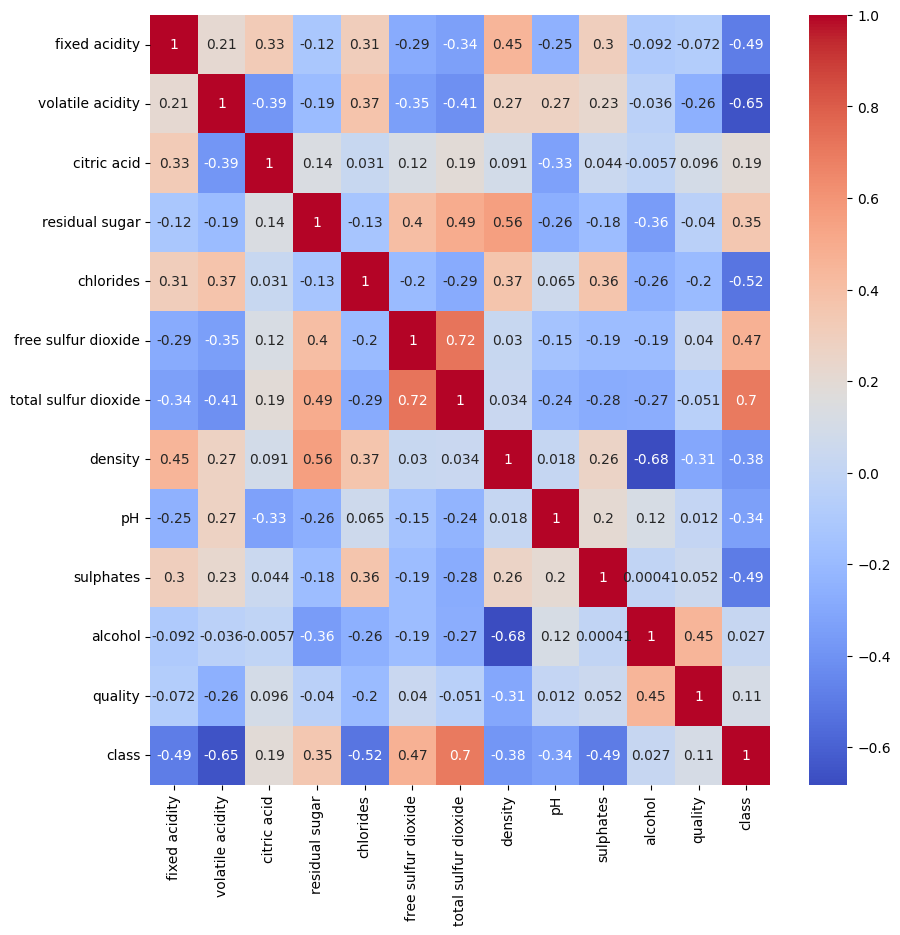

In [149]:
# las matriz de correlacion que utilizamos antes nos servira de nuevo
plt.figure(figsize= (10, 10))
sns.heatmap(corr_matrix, cmap= 'coolwarm', annot= True);

In [150]:
# de momento nos quedamos con residual sugar, chlorides, total sulfur dioxide, density, ph, quality

In [151]:
features_num = pd.DataFrame(al_x_train.drop(columns= ['class', 'quality'])).columns.to_list()
features_cat = pd.DataFrame(al_x_train[['class', 'quality']]).columns.to_list()

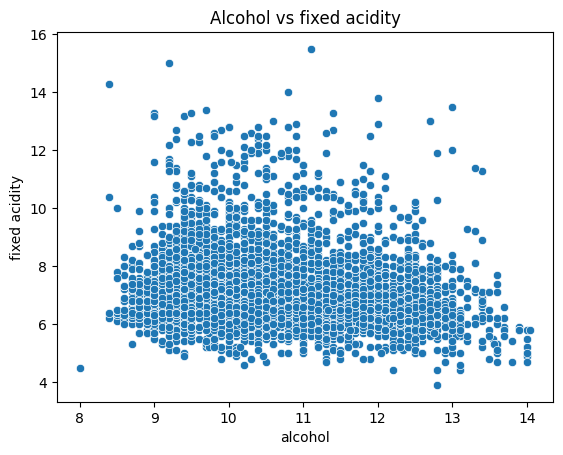

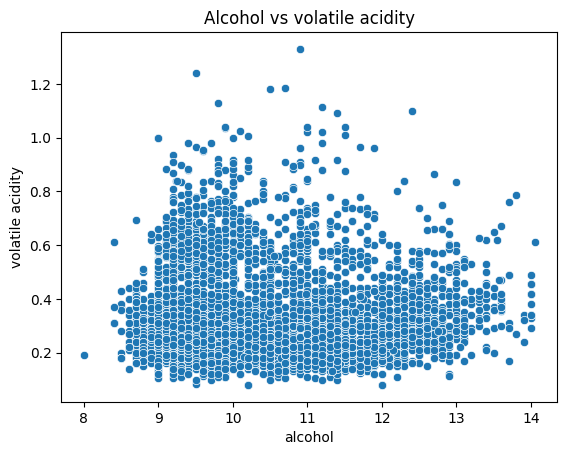

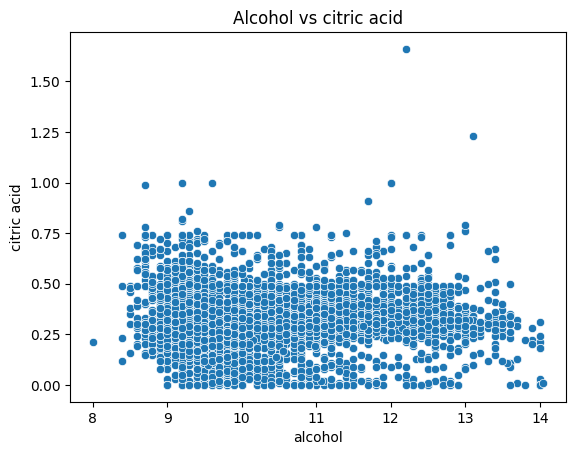

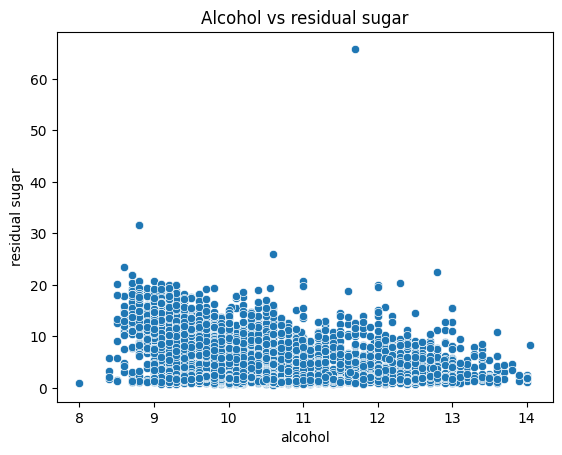

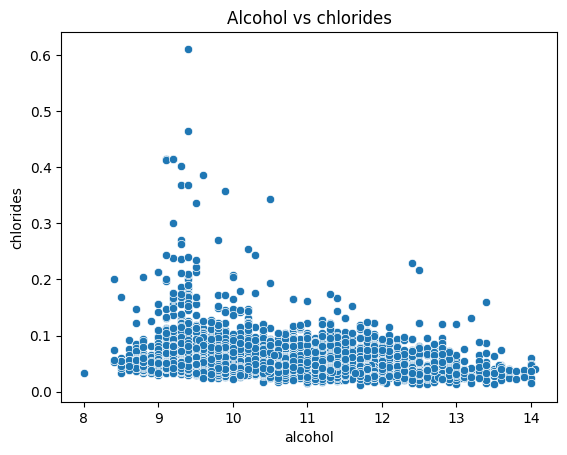

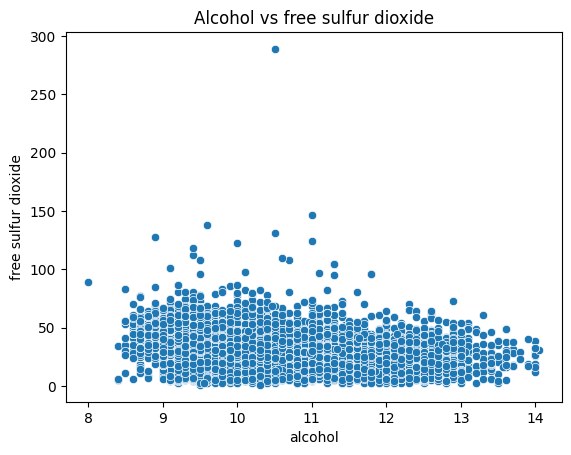

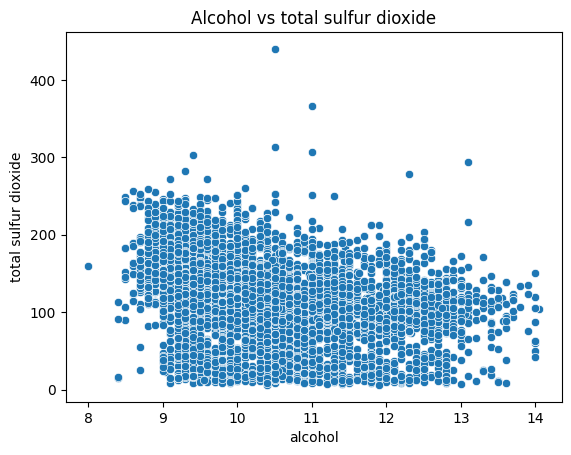

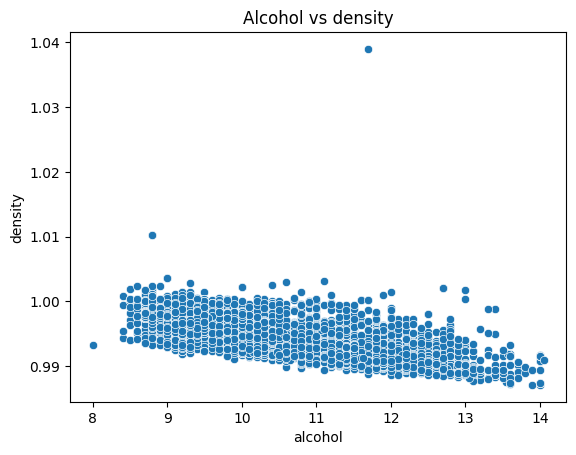

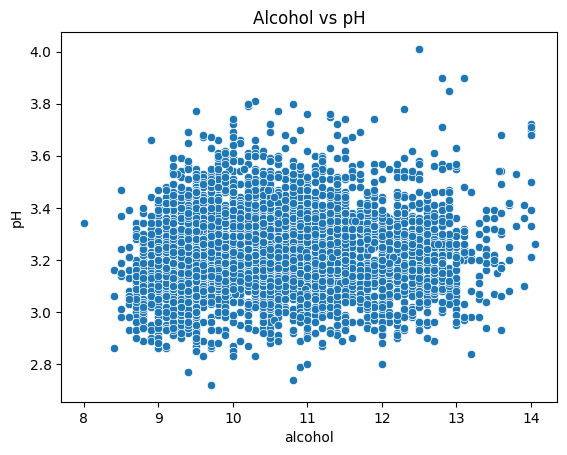

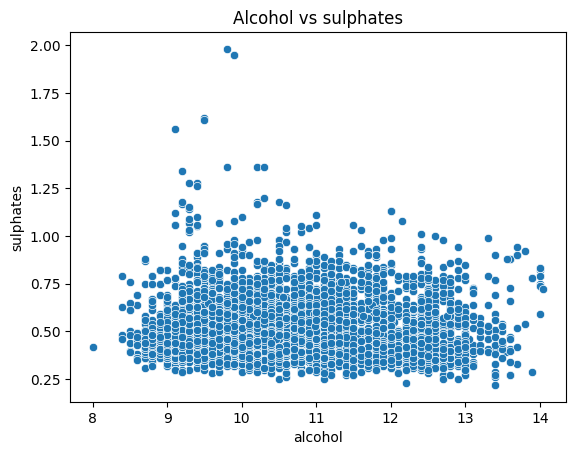

In [152]:
for col in features_num:
    
    sns.scatterplot(train_set, x= 'alcohol', y= col)
    plt.title(f'Alcohol vs {col}')
    plt.show()
    

In [153]:
# en los scatter lo unico que veo mas correlacionado es la densidad, que ya aparecia bastante relacionado en la matriz de correlacion

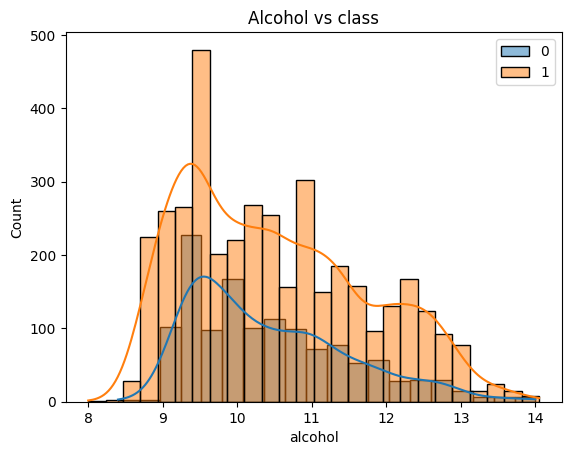

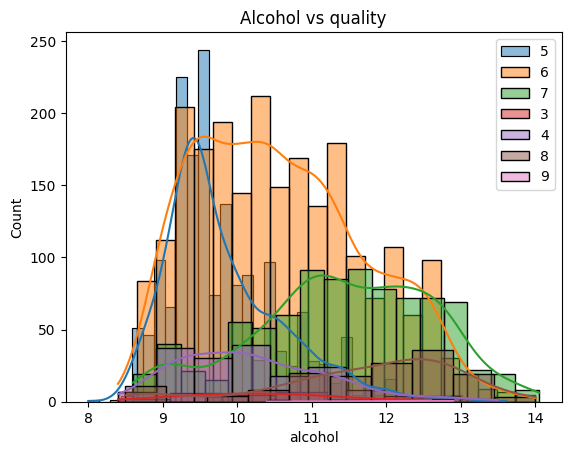

In [154]:
for col in features_cat:
    for val in al_x_train[col].unique():
        sns.histplot(train_set[train_set[col] == val]['alcohol'], kde= True, label= str(val))
        plt.title(f'Alcohol vs {col}')
        plt.legend()
    plt.show();

In [155]:
# clase sigue distribuciones parecidas, quality obvio para adentro, distribuciones claramente diferenciadas

features = ['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'quality']

In [156]:
al_x_train = al_x_train[features]
al_x_test = al_x_test[features]
al_x_train.describe()
# vamos a standarizar esto

,residual sugar,chlorides,total sulfur dioxide,density,pH,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,5.466615,0.055733,115.592457,0.994714,3.219144,5.817587
std,4.783581,0.032656,56.805306,0.003012,0.160025,0.870688
min,0.600000,0.012000,6.000000,0.987110,2.720000,3.000000
25%,1.800000,0.038000,76.000000,0.992360,3.110000,5.000000
50%,3.000000,0.047000,118.000000,0.994900,3.210000,6.000000
75%,8.100000,0.065000,156.000000,0.997000,3.320000,6.000000
max,65.800000,0.611000,440.000000,1.038980,4.010000,9.000000


In [157]:
standarizador = StandardScaler()
al_x_train = pd.DataFrame(standarizador.fit_transform(al_x_train))
al_x_test = pd.DataFrame(standarizador.transform(al_x_test))
al_x_train.describe()

,0,1,2,3,4,5
count,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03,5.197000e+03
mean,-3.623125e-17,-2.242236e-16,4.238373e-17,5.706764e-14,2.365286e-16,-4.173430e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00
min,-1.017456e+00,-1.339304e+00,-1.929450e+00,-2.524538e+00,-3.119464e+00,-3.236359e+00
25%,-7.665738e-01,-5.430607e-01,-6.970523e-01,-7.815705e-01,-6.821081e-01,-9.391033e-01
50%,-5.156916e-01,-2.674378e-01,4.238644e-02,6.169387e-02,-5.714499e-02,2.095246e-01
75%,5.505578e-01,2.838079e-01,7.114024e-01,7.588809e-01,6.303145e-01,2.095246e-01
max,1.261381e+01,1.700493e+01,5.711416e+00,1.469598e+01,4.942560e+00,3.655408e+00


<Axes: xlabel='alcohol', ylabel='Count'>

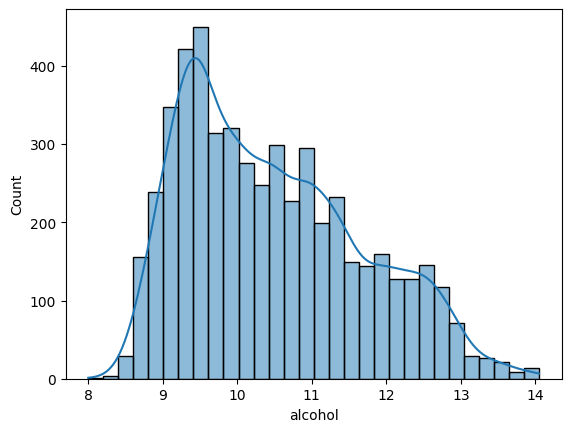

In [158]:
# no recuerdo la distribucion del alcohol

sns.histplot(al_y_train, kde= True)

In [159]:
# voy a normalizarla, para modelos de regresion es conveniente, aunque no necesariamente para todos, yo voy a normalizarla

'''al_y_train = np.log(al_y_train)
sns.histplot(al_y_train, kde= True)'''

# pues no ha normalizado mucho el logaritmos, la distribucion sigue siendo muy parecida, voy a comentar esto y proseguir con el target en su estado normal

'al_y_train = np.log(al_y_train)\nsns.histplot(al_y_train, kde= True)'

vamos a hacer ya modelos

## regresion lineal

In [160]:
lin_reg = LinearRegression()

lin_reg.fit(al_x_train, al_y_train)

y_pred_lin_al =lin_reg.predict(al_x_test)

In [161]:
print(f'MSE prediccion de regresion lineal -> {mean_squared_error(al_y_test, y_pred_lin_al)}.')
print(f'RMSE prediccion de regresion lineal -> {np.sqrt(mean_squared_error(al_y_test, y_pred_lin_al))}.')

MSE prediccion de regresion lineal -> 0.539499631470974.
RMSE prediccion de regresion lineal -> 0.7345063862697002.


In [162]:
print(f'maximo y minimo de graduacion de alcohol ->', al_y_test.min(), '-', al_y_test.max())

# teniendo en cuenta estos valores maximos y minimos un 0.73 de raiz de error medio cuadratico no me parece del todo mal

maximo y minimo de graduacion de alcohol -> 8.0 - 14.9


## gradient boosting regressor

In [163]:
grad_boost = GradientBoostingRegressor(max_depth= 10, random_state= 42)

grad_boost.fit(al_x_train, al_y_train)

y_pred_grad_al = grad_boost.predict(al_x_test)

In [164]:
print(f'MSE prediccion de gradient booting -> {mean_squared_error(al_y_test, y_pred_grad_al)}.')
print(f'RMSE prediccion de gradient boosting -> {np.sqrt(mean_squared_error(al_y_test, y_pred_grad_al))}.')

# han salido unos resultads significativamente mejores que la regresion lineal

MSE prediccion de gradient booting -> 0.23512752186749342.
RMSE prediccion de gradient boosting -> 0.4848994966665705.


## XGboost

In [165]:
xg_boost = xgb.XGBRegressor(max_depth= 10, random_state= 42)

xg_boost.fit(al_x_train, al_y_train)

y_pred_xg_al = xg_boost.predict(al_x_test)

In [166]:
print(f'MSE prediccion de xggboost -> {mean_squared_error(al_y_test, y_pred_xg_al)}.')
print(f'RMSE prediccion de xgboost -> {np.sqrt(mean_squared_error(al_y_test, y_pred_xg_al))}.')

# ahi ahi con el gradiente boost...


MSE prediccion de xggboost -> 0.23784908325353207.
RMSE prediccion de xgboost -> 0.48769773759320645.


voy a optimizar el gradient boost que ha salido ligeramente mejor

In [167]:
grid_reg_boost = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [168]:
grid_model_reg = RandomizedSearchCV(
    grad_boost,
    grid_reg_boost,
    cv= 3, 
    n_jobs= -1
)

grid_model_reg.fit(al_x_train, al_y_train)

RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(max_depth=10,
                                                       random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [169]:
grid_model_reg.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [170]:
grid_model_reg.best_score_

# 0.81???

0.8148071719229049

In [171]:
grad_boost_opt = grid_model_reg.best_estimator_

In [172]:
y_pred_grad_opt = grad_boost_opt.predict(al_x_test)

In [173]:
print('MSE gradient boost optimizado -> ', mean_squared_error(al_y_test, y_pred_grad_opt))
print('MSE gradient boost optimizado -> ', np.sqrt(mean_squared_error(al_y_test, y_pred_grad_opt)))

# meh, ha mejorado ligeramente nuestro modelo original, poco pero menos da una piedra

MSE gradient boost optimizado ->  0.23737262905896434
MSE gradient boost optimizado ->  0.4872090198867056


## estoy probando cosas y tal

In [174]:
dict_grafica= {
    'x': al_y_test,
    'y': y_pred_grad_opt,
}

df_grafica = pd.DataFrame(dict_grafica)

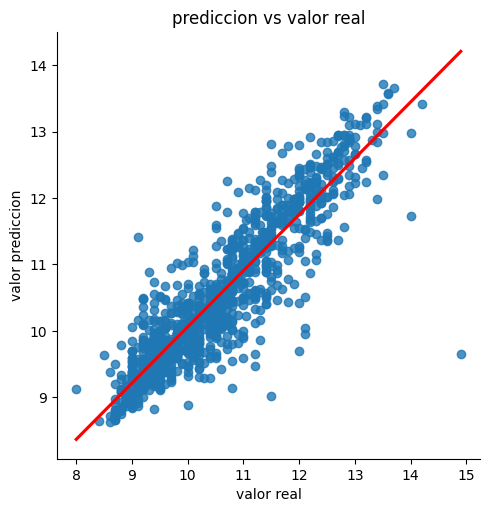

In [175]:
sns.lmplot(x= 'x', y= 'y', data= df_grafica, line_kws= {'color': 'red'}, ci=None)
plt.ylabel('valor prediccion')
plt.xlabel('valor real')
plt.title('prediccion vs valor real');

# los valores no parecen especialmente dispersos

# parece que falla mas en los valores mas elevados

# hay un punto ahi salvaje con valor real de 15 y prediccion de 10, eso ha tenio que subir el MSE mucho

In [176]:
grad_boost_opt.feature_importances_

array([0.11532307, 0.05912023, 0.10997577, 0.61921136, 0.05539208,
       0.04097749])